In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [81]:
print(df.isnull().sum())

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64


In [184]:
df = df.dropna()

In [82]:
df.to_csv('cleaned_subscription_df.csv', index=False)

In [185]:
print(df.describe())

          User_ID         Age  Monthly_Payment  Monthly_Hours_Watched  \
count  246.000000  246.000000       246.000000             246.000000   
mean   505.361789   43.174797        14.502195              17.039672   
std    284.676765   15.507139         3.494289              17.236483   
min     13.000000   18.000000         9.990000               0.041574   
25%    273.250000   30.000000         9.990000               5.105890   
50%    501.500000   41.000000        14.990000              11.948593   
75%    752.250000   56.000000        14.990000              23.618435   
max    999.000000   70.000000        19.990000             108.122364   

       Average_Session_Length   Content_ID  Rating_Given  Churned  
count              246.000000   246.000000    246.000000    246.0  
mean                 1.920114  1050.443089      2.593496      1.0  
std                  1.841691    30.536877      1.273513      0.0  
min                  0.000821  1000.000000      1.000000      1.0  
25

In [188]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,churn
12,13,41,Other,North,2021-04-22 01:53:37.657108,Standard,14.99,Direct Debit,14.011035,Sci-Fi,Mobile,0.152133,1059,5,1,2021-06-13 01:53:37.657108,Found better service,0
13,14,70,Other,South,2020-10-29 01:53:37.657119,Standard,14.99,Direct Debit,35.339461,Sci-Fi,Mobile,3.346005,1011,2,1,2021-03-11 01:53:37.657119,Found better service,0
14,15,53,Other,East,2023-10-06 01:53:37.657130,Standard,14.99,Credit Card,14.191293,Documentary,Mobile,2.791956,1020,1,1,2024-07-02 01:53:37.657130,Price increase,0
16,17,41,Other,South,2019-07-27 01:53:37.657151,Premium,19.99,Credit Card,12.991876,Drama,Mobile,2.519855,1043,1,1,2020-03-16 01:53:37.657151,Found better service,0
29,30,39,Male,North,2019-11-05 01:53:37.657296,Standard,14.99,Credit Card,22.258651,Comedy,Mobile,0.838116,1034,2,1,2020-08-13 01:53:37.657296,Price increase,0


In [186]:
df['churn'] = df['Subscription_Type'].apply(lambda x: 1 if x in ['Inactive', 'Cancelled'] else 0)

In [181]:
start_date_col = 'Subscription_Start_Date'
end_date_col = 'Date_of_Churn'
tier_col = 'Subscription_Type'
user_id_col = 'User_ID'

In [86]:
df[start_date_col] = pd.to_datetime(df[start_date_col])
df[end_date_col] = pd.to_datetime(df[end_date_col])

In [193]:
total_standard_users = len(initial_standard_users)
total_downgraded_users = len(downgraded_users)
downgrade_rate = total_downgraded_users / total_standard_users
print(f'Downgrade Rate: {downgrade_rate:.2%}')

Downgrade Rate: 0.00%


In [192]:
churned_users = df_cleaned[df_cleaned['Churned'] == True].shape[0]
total_users = df_cleaned.shape[0]
churn_rate = churned_users / total_users
print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 100.00%


In [90]:

df['subscription_duration'] = (df[end_date_col] - df[start_date_col]).dt.days
average_duration = df['subscription_duration'].mean()
print(f'Average Subscription Duration: {average_duration:.2f} days')

Average Subscription Duration: 195.36 days


In [94]:
# Drop rows with missing values for simplicity 
df_cleaned = df.dropna()

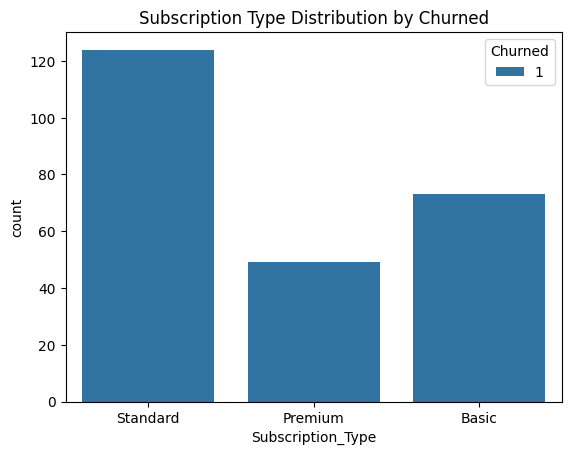

In [95]:

sns.countplot(x='Subscription_Type', hue='Churned', data=df_cleaned)
plt.title('Subscription Type Distribution by Churned')
plt.show()

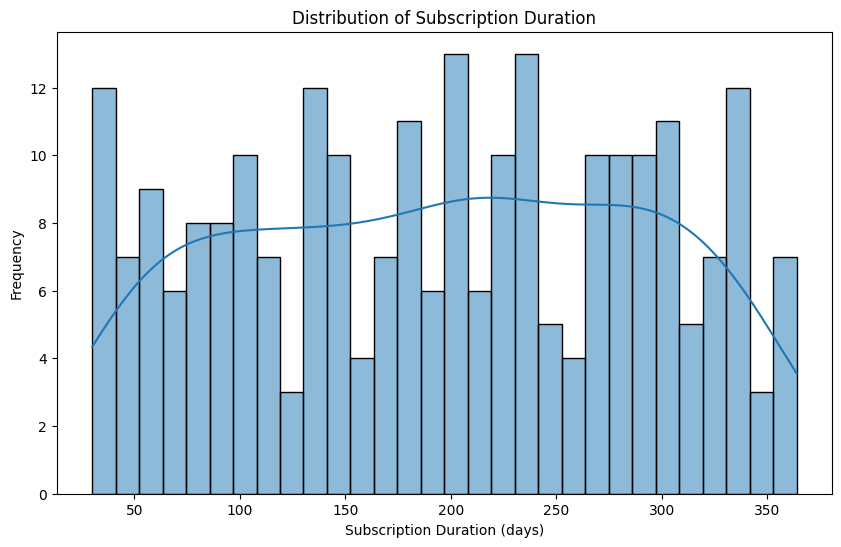

In [96]:

plt.figure(figsize=(10, 6))
sns.histplot(df['subscription_duration'].dropna(), bins=30, kde=True)
plt.title('Distribution of Subscription Duration')
plt.xlabel('Subscription Duration (days)')
plt.ylabel('Frequency')
plt.show()

In [99]:

numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

print(df_cleaned.dtypes)


numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])


User_ID                             int64
Age                                 int64
Gender                             object
Location                           object
Subscription_Start_Date    datetime64[ns]
Subscription_Type                  object
Monthly_Payment                   float64
Payment_Method                     object
Monthly_Hours_Watched             float64
Favorite_Genre                     object
Devices_Used                       object
Average_Session_Length            float64
Content_ID                          int64
Rating_Given                        int64
Churned                             int64
Date_of_Churn              datetime64[ns]
Reason_for_Churn                   object
subscription_duration             float64
dtype: object


In [100]:

corr_matrix = numeric_df.corr()

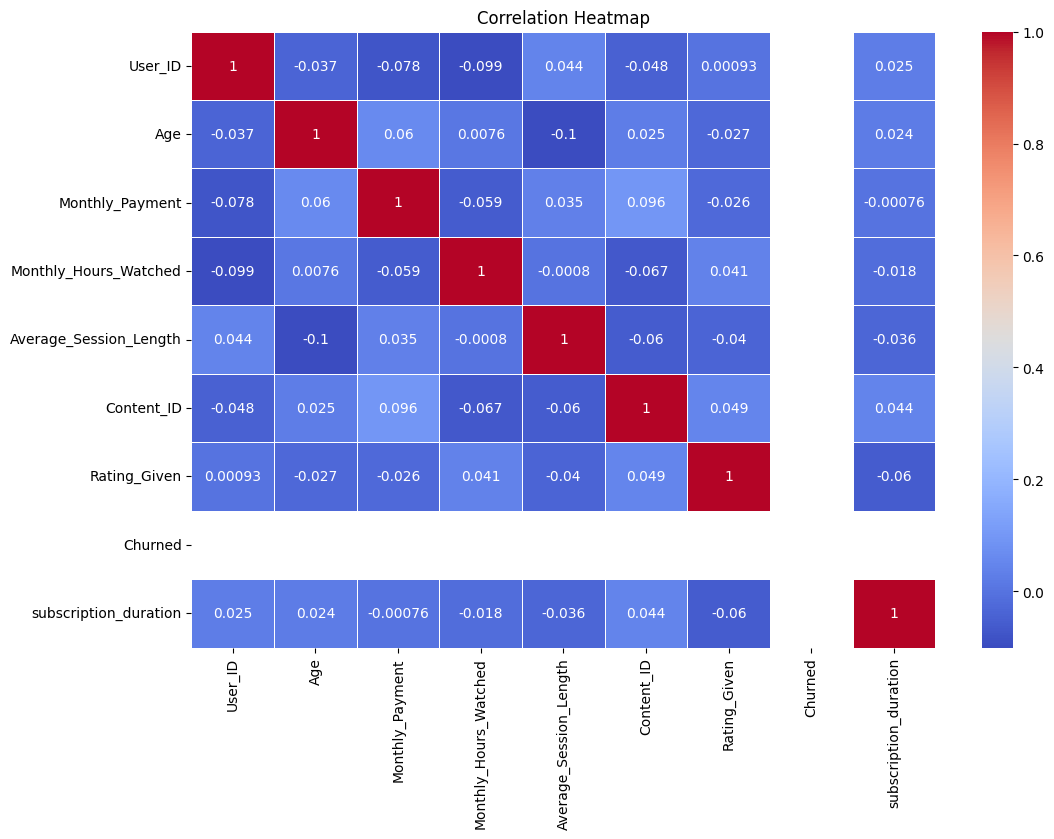

In [101]:

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [175]:

print(f"Initial 'Standard' Tier Users: {total_standard_users}")
print(f"Downgraded Users: {total_downgraded_users}")
print(f'Downgrade Rate: {downgrade_rate:.2%}')
print(f'Total Churned Users: {total_churned_users}')
print(f'Churn Rate: {churn_rate:.2%}')
print(f'Average Subscription Duration: {average_duration:.2f} days')


Initial 'Standard' Tier Users: 530
Downgraded Users: 0
Downgrade Rate: 0.00%
Total Churned Users: 246
Churn Rate: 100.00%
Average Subscription Duration: 195.36 days


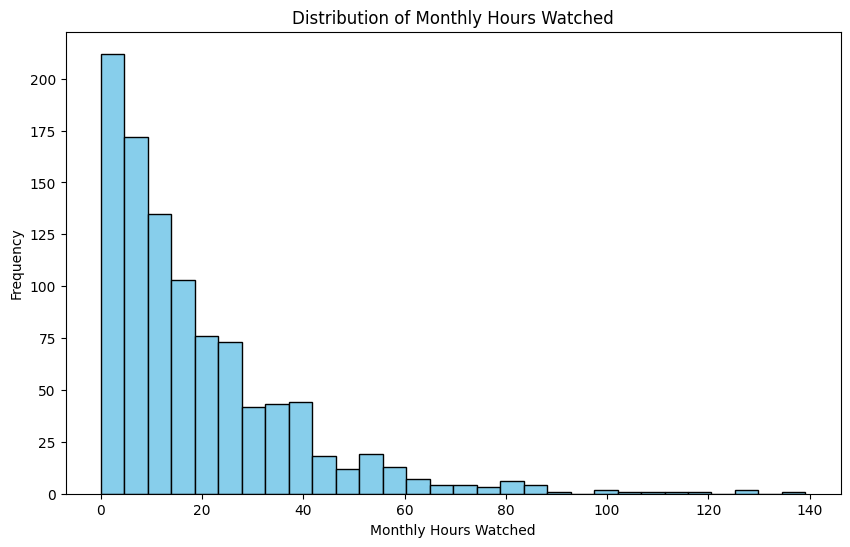

In [119]:

plt.figure(figsize=(10, 6))
plt.hist(df['Monthly_Hours_Watched'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Hours Watched')
plt.xlabel('Monthly Hours Watched')
plt.ylabel('Frequency')
plt.show()

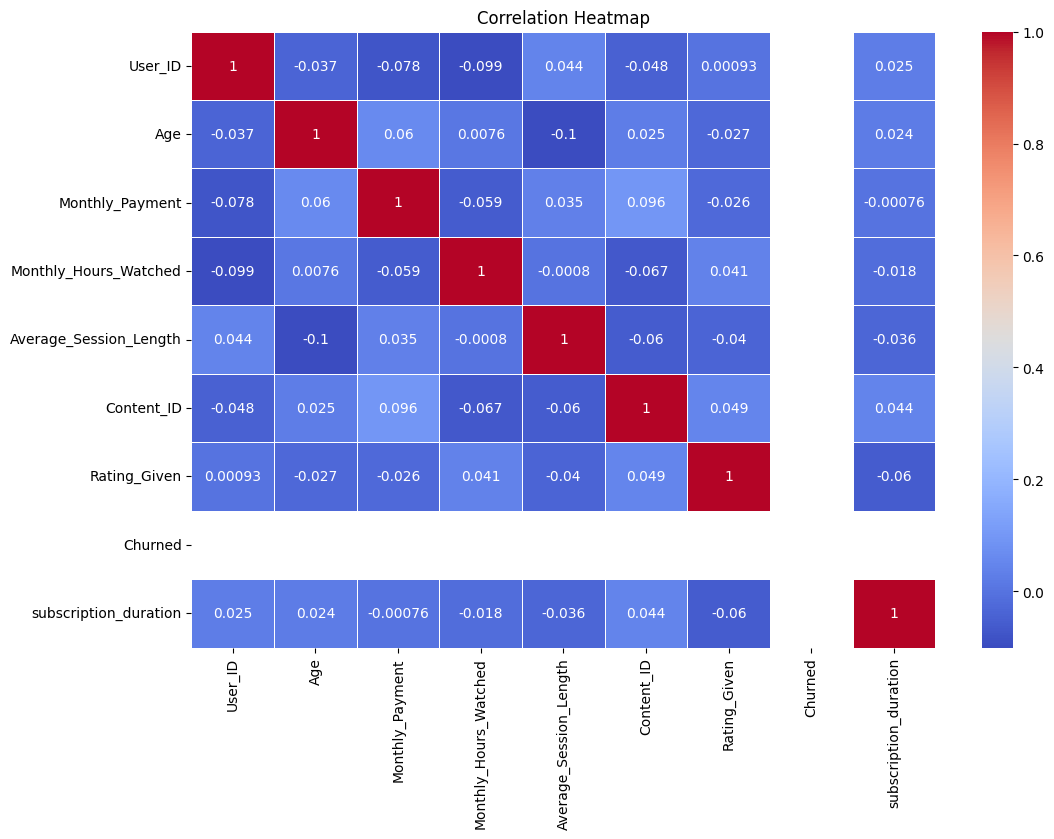

In [180]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()